In [1]:
%matplotlib inline

import numpy as np
import matplotlib
matplotlib.use('PDF')
import matplotlib.pyplot as plt
import BSS
import ns
import history_cmc_modified_bss as hbss
import scripts
import unit_convert

import seaborn as sns
import pandas as pd
import math
import scipy
from glob import glob

matplotlib.rcParams.update({'font.size': 18})

savepath='/projects/b1011/syr904/projects/BSS/plots'

/software/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


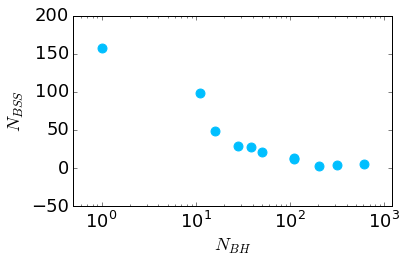

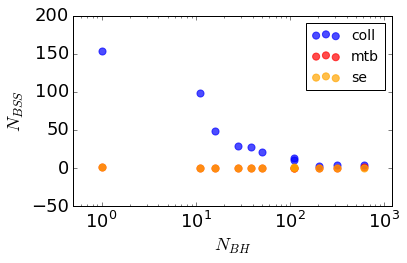

In [3]:
##Plot Nbh-Nbss
datan=np.genfromtxt('/projects/b1011/syr904/projects/BSS/bss_num.dat', dtype=float)
Nbss=np.array(datan[:,1])
Nbh=np.array(datan[:,2])
Ntot=np.array(datan[:,3])
Ncoll=np.array(datan[:,5])
Nse=np.array(datan[:,6])
Nmtb=np.array(datan[:,7])


#rho, p=ss.spearmanr(np.log(NBH/NTOT), np.log(NBSS/NTOT))
#print rho, p


plt.figure()
plt.scatter(Nbh, Nbss, s=80, color='deepskyblue')
plt.xlim(0.5, 1200.)
#plt.ylim(-10., -1.)
plt.xscale('log')
#plt.yscale('symlog')
plt.xlabel(r'$N_{BH}$')
plt.ylabel(r'$N_{BSS}$')
plt.tight_layout()
plt.savefig(savepath+'BHBSS.pdf', dpi=300)

#plt.figure()
#plt.scatter(-20, -20, color='purple', s=10, label='single')
#plt.scatter(-20, -20, color='orange', s=10, label='binary')
#plt.scatter(-20, -20, marker='*', s=10, label='single')
#plt.scatter(-20, -20, marker='^', s=10, label='binary')	
#for k in range(0, 16):
    #plt.scatter(np.log(NBH[k]/NTOT[k]), np.log(NSIN[k]/NTOT[k]), color='purple', s=10)
    #plt.scatter(np.log(NBH[k]/NTOT[k]), np.log(NBIN[k]/NTOT[k]), color='orange', s=10, alpha=0.7)
#for k1 in range(16, 32):
    #plt.scatter(np.log(NBH[k]/NTOT[k]), np.log(NSIN[k]/NTOT[k]), s=10, marker='*')
    #plt.scatter(np.log(NBH[k]/NTOT[k]), np.log(NBIN[k]/NTOT[k]), s=10, alpha=0.7, marker='^')
#plt.scatter(np.log(NBH/NTOT), np.log(NSIN/NTOT), color='purple', s=10, label='single')
#plt.scatter(np.log(NBH/NTOT), np.log(NBIN/NTOT), color='orange', s=10, alpha=0.7, label='binary')
#plt.xlabel('log(Nbh/Ntot)')
#plt.ylabel('log(Nbss/Ntot)')
#plt.legend(loc='upper right')
#plt.ylim(ymin=-15)
#plt.xlim(xmin=-14)
#plt.show()
#plt.savefig('/projects/b1011/syr904/projects/SinBinBSS.pdf', dpi=300)

plt.figure()
plt.scatter(Nbh, Ncoll, color='blue', alpha=0.7, s=50, label='coll')
plt.scatter(Nbh, Nmtb, color='red', alpha=0.7, s=50, label='mtb')
plt.scatter(Nbh, Nse, color='orange', alpha=0.7, s=50, label='se')
plt.legend(loc='upper right', prop={'size': 14})
plt.xscale('log')
plt.xlim(0.5, 1200.)
plt.xlabel(r'$N_{BH}$')
plt.ylabel(r'$N_{BSS}$')
plt.tight_layout()
plt.savefig(savepath+'classBSS.pdf', dpi=300)

0.850039027148
[ '/projects/b1011/kyle/cmc/newruns/rundir/rv_grid/FB_rvscale_0.5alt/initial.snap0225.hrdiag.dat']


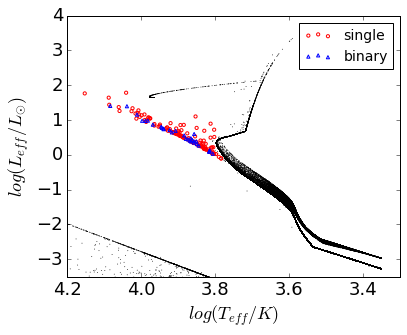

In [16]:
##Plot hrdiag
path=np.genfromtxt('/projects/b1011/syr904/projects/BSS/rvgrid_path.dat', dtype=str)

sourcedir=path[0]
t, pref, ls=BSS.find_para(sourcedir)
mtoguess=scripts.find_MS_turnoff(t)
z=0.001
mtotrue=scripts.find_MS_TO(t, z, mtoguess)
mcut=1.05*mtotrue
print mcut
    
hrdiags=np.sort(glob(sourcedir+'/'+pref+'*.hrdiag.dat'))
print hrdiags
datahrd=np.genfromtxt(hrdiags[-1])
binflag=datahrd[:,0]; k0=datahrd[:,1]; k1=datahrd[:,2]; m0=datahrd[:,6]; m1=datahrd[:,7]; Teff=datahrd[:,15]; Leff=datahrd[:,16]
si_bssL=[]; bi_bssL=[]; starL=[]; si_bssT=[]; bi_bssT=[]; starT=[]
for k in range(len(binflag)):
    if binflag[k]==1:
        if ((k0[k]==0 or k0[k]==1) and m0[k]>=1.05*mtotrue) or ((k1[k]==0 or k1[k]==1) and m1[k]>=1.05*mtotrue):
            bi_bssT.append(Teff[k]); bi_bssL.append(Leff[k])
            #print datahrd[:,4][k], datahrd[:,5][k]
        else:
            starT.append(Teff[k]); starL.append(Leff[k])

    if binflag[k]!=1:
        if (k0[k]==0 or k0[k]==1) and m0[k]>=1.05*mtotrue:
            si_bssT.append(Teff[k]); si_bssL.append(Leff[k])
        else:
            starT.append(Teff[k]); starL.append(Leff[k])
    #print bi_bssT, bi_bssL

plt.rcParams['figure.figsize'] = [6, 5]
plt.figure()
ax=plt.gca()
ax.set_xlabel(r'$log(T_{eff}/K)$')
ax.set_ylabel(r'$log(L_{eff}/L_{\odot})$')
ax.set_xlim(3.3, 4.2)
ax.set_ylim(-3.5, 4)
ax.scatter(starT, starL, marker='.', s=3, edgecolors='none', facecolor='k')
ax.scatter(si_bssT, si_bssL, marker='o', s=10, facecolors='none', edgecolors='r', label='single')
ax.scatter(bi_bssT, bi_bssL, marker='^', s=10, facecolors='none', edgecolors='b', label='binary')
ax.legend(loc='upper right', prop={'size': 14})
ax.invert_xaxis()
plt.tight_layout()
plt.savefig('/projects/b1011/syr904/projects/BSS/hrd0.pdf', dpi=300)

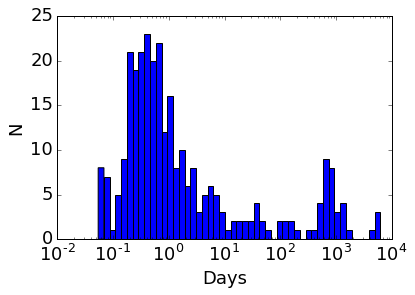

In [29]:
##Plot Orbital Period Distribution of MS-WD binaries
path=savepath+'MSWDbinaries'
datamswd=np.genfromtxt(path+'/MSWD7.dat')
period=[]
m0=np.array(datamswd[:,2]); m1=np.array(datamswd[:,3]); a=np.array(datamswd[:,6]); ecc=np.array(datamswd[:,7])
for i in range(len(m0)):
    period.append(unit_convert.au_to_period(a[i], m0[i], m1[i]))

period=np.array(period)/24.

fig=plt.figure()
ax=plt.gca()
ax.hist(period,  bins=np.logspace(np.log10(min(period)),np.log10(max(period)), 50), color='blue')
ax.set_xlabel('Days')
ax.set_ylabel('N')
ax.set_xscale('log')

['/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap00.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap01.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap02.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap03.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap04.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap05.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap06.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap07.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap08.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap09.dat'
 '/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_lastsnap10.dat']


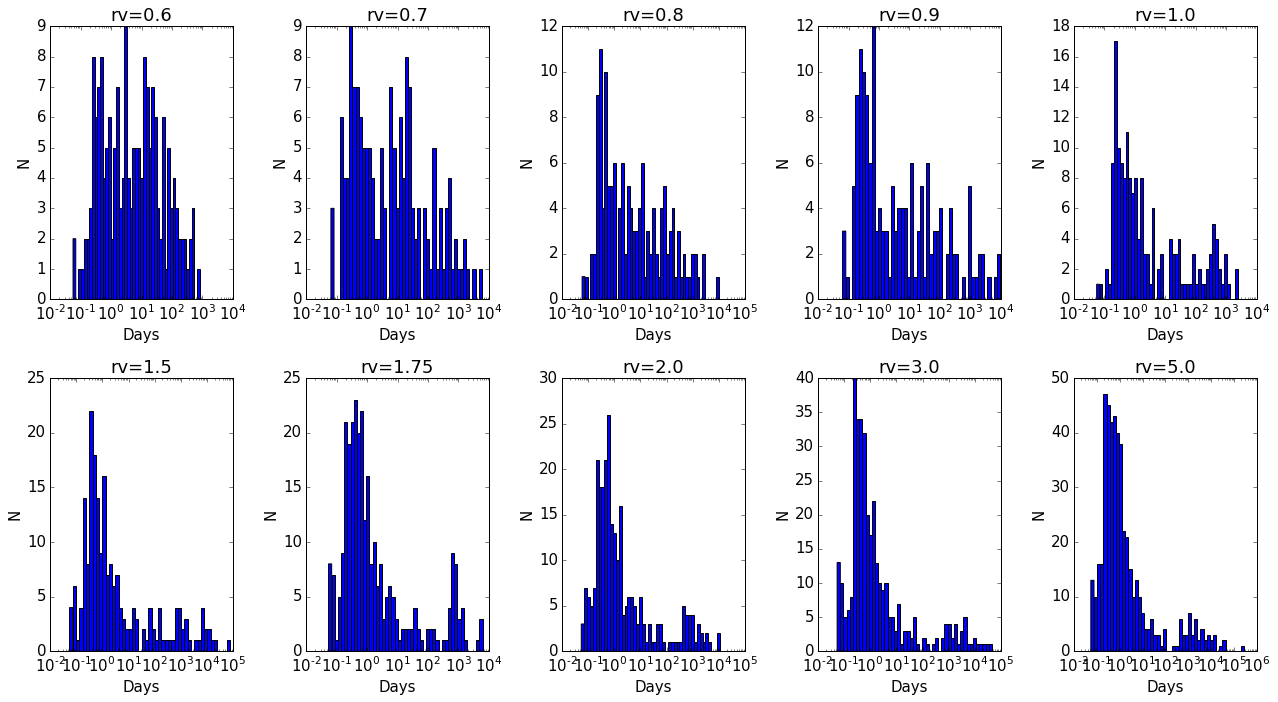

In [19]:
##Plot Orbital Period Distribution of MS-WD binaries for all models
path='/projects/b1011/syr904/projects/BSS/MSWDbinaries'
MSWDfiles=np.sort(glob(path+'/MSWD_lastsnap*.dat'))
print MSWDfiles

titles=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 1.75, 2.0, 3.0, 5.0]

matplotlib.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = [18, 10]

fig, axs=plt.subplots(2, 5)
axa=plt.gca()
for k in range(1,len(MSWDfiles)):
    datamswd=np.genfromtxt(MSWDfiles[k])
    period=[]
    m0=np.array(datamswd[:,2]); m1=np.array(datamswd[:,3]); a=np.array(datamswd[:,6]); ecc=np.array(datamswd[:,7])
    for i in range(len(m0)):
        period.append(unit_convert.au_to_period(a[i], m0[i], m1[i]))

    period=np.array(period)/24.
    
    if k<=5:
        axs[0, k-1].hist(period,  bins=np.logspace(np.log10(min(period)),np.log10(max(period)), 50), color='blue')
        axs[0, k-1].set_xlabel('Days')
        axs[0, k-1].set_ylabel('N')
        axs[0, k-1].set_xscale('log')
        axs[0, k-1].set_title('rv='+str(titles[k]))
    else:
        axs[1, k-6].hist(period,  bins=np.logspace(np.log10(min(period)),np.log10(max(period)), 50), color='blue')
        axs[1, k-6].set_xlabel('Days')
        axs[1, k-6].set_ylabel('N')
        axs[1, k-6].set_xscale('log')
        axs[1, k-6].set_title('rv='+str(titles[k]))

    
plt.tight_layout()
plt.savefig(savepath+'/MSWD_allPorb.pdf', dpi=300)

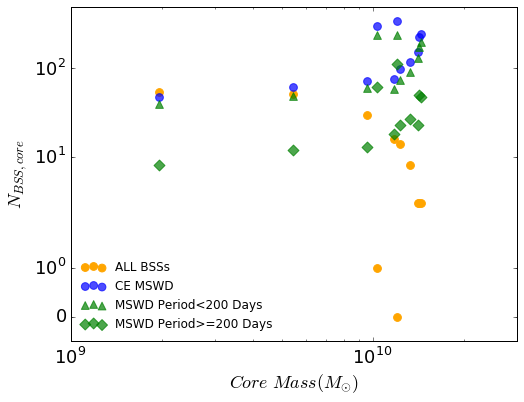

In [8]:
##Plot Core Nbss and Core mass
databss=np.genfromtxt('/projects/b1011/syr904/projects/BSS/bss_num.dat')
Mc=databss[:,-2]; Nbssc=databss[:,2]

Nce=[]; Nce_short=[]; Nce_long=[]
MSWD_ce=np.sort(glob('/projects/b1011/syr904/projects/BSS/MSWDbinaries/MSWD_CE*.dat'))
for i in range(len(MSWD_ce)):
    datace=np.genfromtxt(MSWD_ce[i])
    Nce.append(len(datace[:,0])); sma=datace[:,7]; m0=datace[:,3]; m1=datace[:,4]
    nce_short=0; nce_long=0
    for j in range(len(sma)):
        period=unit_convert.au_to_period(sma[j], m0[j], m1[j])/24.
        if period<200: nce_short+=1
        else: nce_long+=1
    Nce_short.append(nce_short); Nce_long.append(nce_long)
    
    
plt.rcParams['figure.figsize'] = [8, 6]

plt.figure()
plt.scatter(Mc, Nbssc, color='orange', s=60, label='ALL BSSs')
plt.scatter(Mc, Nce, color='blue', s=60, label='CE MSWD', alpha=0.7)
plt.scatter(Mc, Nce_short, color='green', s=60, marker='^', label='MSWD Period<200 Days', alpha=0.7)
plt.scatter(Mc, Nce_long, color='green', s=60, marker='D', label='MSWD Period>=200 Days', alpha=0.7)
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(-0.5, 500)
plt.xlim(10**9, 3*10**10)
plt.xlabel(r'$Core\ Mass(M_{\odot})$')
plt.ylabel(r'$N_{BSS,core}$')
plt.legend(loc='lower left', prop={'size': 12}, numpoints=1, frameon=False)

In [ ]:
##Plot Mass Distribution
def plot_massdist():
    for k in range(0, 600, 100):
        filepath=str(data[k])
        time, mms=find_MS(filepath)
        mtoguess=scripts.find_MS_turnoff(time)
        print mtoguess
        z=dataz[k]
        mtotrue=scripts.find_MS_TO(time, z, mtoguess)
        print mtotrue
        
        plt.figure()
        plt.yscale('log')
        plt.hist(mms, bins=50,color='orange')
        plt.axvline(x=mtotrue, color='b', linestyle='--')
        plt.xlabel(r'$mass(M_{\odot})$')
        #plt.title(filepath)
        plt.show()

In [ ]:
##Plot Nbh-Nbss-single-binary
def plot__Nbss_sinbin():
    datan=np.genfromtxt('/Users/shiye/Documents/ClusterGroup/BSSproject/bssnum.dat')
    NBSS=datan[:,0]; NBH=datan[:,1]; NTOT=datan[:,2]; NBSSSI=datan[:,3]; NBSSBI=datan[:,4]
    
    rho, p=ss.spearmanr(np.log(NBH/NTOT), np.log(NBSS/NTOT))
    rhos, ps=ss.spearmanr(np.log(NBH/NTOT), np.log(NBSSSI/NTOT))
    rhob, pb=ss.spearmanr(np.log(NBH/NTOT), np.log(NBSSBI/NTOT))
    
    print rho, p
    print rhos, ps
    print rhob, pb
    
    plt.figure(1)
    plt.scatter(np.log(NBH/NTOT), np.log(NBSSSI/NTOT), color='purple', label='single', s=8)
    plt.scatter(np.log(NBH/NTOT), np.log(NBSSBI/NTOT), color='orange', label='binary', s=5, alpha=0.7)
    plt.xlabel('log(Nbh/Ntot)')
    plt.ylabel('log(Nbss/Ntot)')
    plt.legend(loc='lower left')
    
    #plt.figure(2)
    #plt.scatter(np.log(NBH/NTOT), np.log(NBSSBI/NTOT), color='orange', label='binary', s=8)
    #plt.xlabel('Nbh/Ntot')
    #plt.ylabel('Nbss/Ntot')
    #plt.legend(loc='lower left')
    
    #plt.subplot(133)
    #plt.scatter(np.log(NBH/NTOT), np.log(NBSS/NTOT), marker='.')
    #plt.xlabel('Nbh/Ntot')
    #plt.ylabel('Nbss/Ntot')
    
    plt.savefig('/Users/shiye/Documents/ClusterGroup/BSSproject/nbhnbss_all.png', dpi = 300)
    #plt.show()
    

In [ ]:
##Plot Nbh_Nbss class
def plot_Nbss_class():
    datan=np.genfromtxt('/Users/shiye/Documents/ClusterGroup/BSSproject/bssnum.dat')
    NBSS=datan[:,0]; NBH=datan[:,1]; NTOT=datan[:,2]; NBSSSI=datan[:,3]; NBSSBI=datan[:,4]
    dataclass=np.genfromtxt('/Users/shiye/Documents/ClusterGroup/BSSproject/BSSclass.dat')
    COLL=dataclass[:,0]; MTB=dataclass[:,8]
    nbh=[]; ntot=[]; coll=[]; mtb=[]
    for i in range(len(COLL)):
        if COLL[i]!=-100:
            nbh.append(NBH[i]); ntot.append(NTOT[i])
            coll.append(COLL[i]); mtb.append(MTB[i])
    
    
    nbh=np.array(nbh); ntot=np.array(ntot); coll=np.array(coll); mtb=np.array(mtb)
    
    rhocoll, pcoll=ss.spearmanr(np.log(nbh/ntot), np.log(coll/ntot))
    rhomtb, pmtb=ss.spearmanr(np.log(nbh/ntot), np.log(mtb/ntot))
    print rhocoll, pcoll
    print rhomtb, pmtb
    
    plt.figure()
    plt.scatter(np.log(nbh/ntot), np.log(coll/ntot), color='blue', s=8, label='coll')
    plt.scatter(np.log(nbh/ntot), np.log(mtb/ntot), color='red', alpha=0.7, s=8, label='mtb')
    plt.legend(loc='lower left')
    plt.xlabel('log(Nbh/Ntot)')
    plt.ylabel('log(Nbss/Ntot)')
    
    plt.savefig('/Users/shiye/Documents/ClusterGroup/BSSproject/nbhnbss_class.png', dpi = 300)
    #plt.show()

In [ ]:
##Plot rc_Nbss and Nbh_rc
def plot_Nbss_rc(pathlist, start, end):
    pref='initial'
    sourcedir=np.genfromtxt(pathlist, dtype='|S')
    RC=[]; NBH=[]; NBSS=[]; NSIN=[]; NBIN=[]; NCOLL=[]; NMTB=[]; NSE=[]
    for i in range(start, end):
    	filepath=sourcedir[i]
        pref='initial'
        filestr=filepath+'/'+pref
        snapobs=np.sort(glob(filestr+'.snap*.obs_params.dat'))
        lastsnapobs=snapobs[-1]

        Rc, Rhl, T_Gyr, Nbh=dyn.find_rcrh(lastsnapobs)
        RC.append(Rc); NBH.append(Nbh)

	Nsin, Nbin, Ncoll, Nmtb, Nse=find_NBSS(filestr)
	NBSS.append(Nsin+Nbin); NSIN.append(Nsin); NBIN.append(Nbin); NCOLL.append(Ncoll); NMTB.append(Nmtb); NSE.append(Nse)
	
	print i

    RC=np.array(RC); NBH=np.array(NBH); NBSS=np.array(NBSS); NSIN=np.array(NSIN); NBIN=np.array(NBIN); NCOLL=np.array(NCOLL); NMTB=np.array(NMTB); NSE=np.array(NSE)


    plt.figure()
    plt.subplot(1,2,1)
    plt.scatter(NBH[0], RC[0], color='k', label='rv=1')
    plt.scatter(NBH[16], RC[16], color='gold', label='rv=2')
    for j in range(1, 16):
        plt.scatter(NBH[j], RC[j], color='k')
    for j1 in range(17, 32):
        plt.scatter(NBH[j1], RC[j1], color='gold')
    plt.xlabel(r'$N_{bh}$', fontsize=15)
    plt.ylabel(r'$r_c$', fontsize=15)
    plt.xscale('log')
    plt.legend(loc='upper left')
    
    plt.subplot(1,2,2)
    plt.scatter(RC, NBSS)
    plt.xlabel(r'$r_c$', fontsize=15)
    plt.ylabel(r'$N_{bss}$', fontsize=15)
    plt.yscale('log')
    plt.title('All Models')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


    plt.figure()
    plt.subplot(1,2,1)
    plt.scatter(RC, NSIN, label='single', color='purple', s=12)
    plt.scatter(RC, NBIN, label='binary', color='orange', s=12, alpha=0.7)
    plt.xlabel(r'$r_c$', fontsize=15)
    plt.ylabel(r'$N_{bss}$', fontsize=15)
    plt.yscale('log')
    plt.title('Single-Binary')
    plt.legend(loc='upper right')
   
    plt.subplot(1,2,2)
    plt.scatter(RC, NCOLL, label='coll', color='b', s=12)
    plt.scatter(RC, NMTB, label='mtb', color='r', s=12)
    plt.scatter(RC, NSE, label='se', color='orange', s=12, alpha=0.7)
    plt.xlabel(r'$r_c$', fontsize=15)
    plt.ylabel(r'$N_{bss}$', fontsize=15)
    plt.ylim(ymin=0.5)
    plt.yscale('log')
    plt.title('Formation Channels')
    plt.legend(loc='upper right')

    plt.tight_layout()
   
    plt.show()


    plt.figure()
    plt.subplot(1,2,1)
    plt.scatter(RC[0], NBSS[0], color='k', label='rv=1')
    for j in range(1, 16):
        plt.scatter(RC[j], NBSS[j], color='k')
    plt.xlabel(r'$r_c$', fontsize=15)
    plt.ylabel(r'$N_{bss}$', fontsize=15)
    plt.yscale('log')
    plt.legend(loc='upper right')

    plt.subplot(1,2,2)
    plt.scatter(RC[16], NBSS[16], color='gold', label='rv=2')
    for j1 in range(17, 32):
        plt.scatter(RC[j1], NBSS[j1], color='gold')
    plt.xlabel(r'$r_c$', fontsize=15)
    plt.ylabel(r'$N_{bss}$', fontsize=15)
    plt.yscale('log')
    plt.legend(loc='upper right')

    plt.tight_layout()

    plt.show()